<h4>I used Claude, Anthropic's model to help with the code portion of this assignment.</h4>
<h4>I used Copilot for help understanding these concepts.</h4>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

<h3>(1) Use matrix operations to show that the matrix representation of the linear regression model (𝐘=𝐗𝜷+𝝐) is equivalent to the arbitrary observation representation</h3>

LINEAR REGRESSION: MATRIX vs INDIVIDUAL OBSERVATION EQUIVALENCE

1. MATRIX REPRESENTATION: Y = Xβ + ε
----------------------------------------
X shape: (100, 3)
β shape: (3,)
Y shape: (100,)
ε shape: (100,)

Matrix equation structure:
Y = X @ β + ε
(100,) = (100,3) @ (3,) + (100,)

First 5 observations from matrix calculation:
Y[0] = 4.5938
Y[1] = 0.5148
Y[2] = 0.6038
Y[3] = 0.8931
Y[4] = 3.5081


2. INDIVIDUAL OBSERVATION REPRESENTATION
----------------------------------------
For each observation i: y_i = x_i^T β + ε_i
Where x_i is the i-th row of X (as a column vector)

First 5 observations from individual calculation:
Y[0] = [ 1.          1.62434536 -0.44712856] @ [ 2.   1.5 -0.8] + -0.2004
     = 2.0000 + 2.4365 + 0.3577 + -0.2004
     = 4.5938

Y[1] = [ 1.         -0.61175641  1.2245077 ] @ [ 2.   1.5 -0.8] + 0.4120
     = 2.0000 + -0.9176 + -0.9796 + 0.4120
     = 0.5148

Y[2] = [ 1.         -0.52817175  0.40349164] @ [ 2.   1.5 -0.8] + -0.2812
     = 2.0000 + -0.7923 + -0.3228 

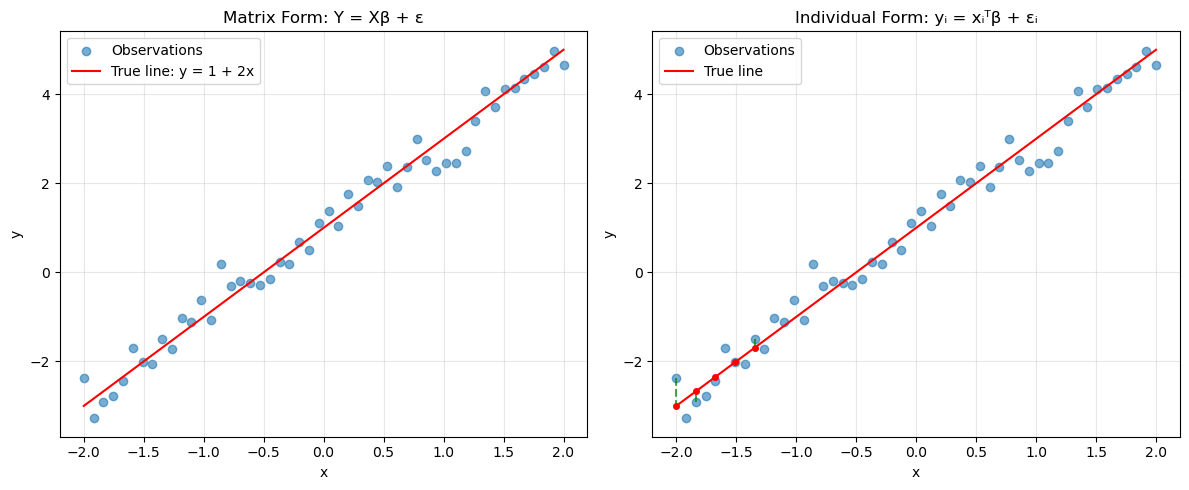


7. COMPUTATIONAL VERIFICATION
----------------------------------------
Key insight: Matrix multiplication is equivalent to
computing dot products of rows with the coefficient vector

Matrix multiplication X @ β:
Result shape: (100,)

Equivalent row-wise dot products:
Results are identical: True

For observation 0:
Matrix approach: (X @ β)[0] = 4.794221
Individual approach: X[0,:] @ β = 4.794221
Manual calculation: 1.000×2.000 + 1.624×1.500 + -0.447×-0.800 = 4.794221

CONCLUSION: The matrix representation Y = Xβ + ε is mathematically
equivalent to the collection of individual observations yᵢ = xᵢᵀβ + εᵢ
Matrix operations provide a compact, vectorized way to express the
same linear relationships that exist at the individual observation level.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(1)

# Generate sample data
n = 100  # number of observations
p = 3    # number of features (including intercept)

# Create feature matrix X with intercept column
X = np.column_stack([
    np.ones(n),           # intercept column
    np.random.randn(n),   # feature 1
    np.random.randn(n)    # feature 2
])

# True coefficients
beta_true = np.array([2.0, 1.5, -0.8])

# Generate response with noise
epsilon = np.random.randn(n) * 0.5
Y = X @ beta_true + epsilon

print("=" * 60)
print("LINEAR REGRESSION: MATRIX vs INDIVIDUAL OBSERVATION EQUIVALENCE")
print("=" * 60)

# ============================================================================
# PART 1: MATRIX REPRESENTATION
# ============================================================================
print("\n1. MATRIX REPRESENTATION: Y = Xβ + ε")
print("-" * 40)

print(f"X shape: {X.shape}")
print(f"β shape: {beta_true.shape}")
print(f"Y shape: {Y.shape}")
print(f"ε shape: {epsilon.shape}")

print("\nMatrix equation structure:")
print("Y = X @ β + ε")
print(f"({Y.shape[0]},) = ({X.shape[0]},{X.shape[1]}) @ ({beta_true.shape[0]},) + ({epsilon.shape[0]},)")

# Calculate Y using matrix operations
Y_matrix = X @ beta_true + epsilon

print(f"\nFirst 5 observations from matrix calculation:")
for i in range(5):
    print(f"Y[{i}] = {Y_matrix[i]:.4f}")

# ============================================================================
# PART 2: INDIVIDUAL OBSERVATION REPRESENTATION
# ============================================================================
print("\n\n2. INDIVIDUAL OBSERVATION REPRESENTATION")
print("-" * 40)

print("For each observation i: y_i = x_i^T β + ε_i")
print("Where x_i is the i-th row of X (as a column vector)")

# Calculate Y using individual observations
Y_individual = np.zeros(n)
for i in range(n):
    # x_i is the i-th row of X
    x_i = X[i, :]  # shape (p,)
    # Calculate y_i = x_i^T @ β + ε_i
    Y_individual[i] = x_i @ beta_true + epsilon[i]

print(f"\nFirst 5 observations from individual calculation:")
for i in range(5):
    x_i = X[i, :]
    y_i_components = x_i * beta_true  # element-wise multiplication to show components
    print(f"Y[{i}] = {x_i} @ {beta_true} + {epsilon[i]:.4f}")
    print(f"     = {y_i_components[0]:.4f} + {y_i_components[1]:.4f} + {y_i_components[2]:.4f} + {epsilon[i]:.4f}")
    print(f"     = {Y_individual[i]:.4f}")
    print()

# ============================================================================
# PART 3: VERIFICATION OF EQUIVALENCE
# ============================================================================
print("\n3. VERIFICATION OF EQUIVALENCE")
print("-" * 40)

# Check if the two approaches give identical results
are_equal = np.allclose(Y_matrix, Y_individual)
max_difference = np.max(np.abs(Y_matrix - Y_individual))

print(f"Are the results identical? {are_equal}")
print(f"Maximum absolute difference: {max_difference:.2e}")

# Show that the original Y equals both calculations
print(f"\nVerification with original Y:")
print(f"Y equals matrix calculation: {np.allclose(Y, Y_matrix)}")
print(f"Y equals individual calculation: {np.allclose(Y, Y_individual)}")

# ============================================================================
# PART 4: MATHEMATICAL BREAKDOWN
# ============================================================================
print("\n\n4. MATHEMATICAL BREAKDOWN")
print("-" * 40)

print("Matrix form: Y = Xβ + ε")
print("⎡y₁⎤   ⎡x₁₁ x₁₂ x₁₃⎤ ⎡β₁⎤   ⎡ε₁⎤")
print("⎢y₂⎥ = ⎢x₂₁ x₂₂ x₂₃⎥ ⎢β₂⎥ + ⎢ε₂⎥")
print("⎢y₃⎥   ⎢x₃₁ x₃₂ x₃₃⎥ ⎢β₃⎥   ⎢ε₃⎥")
print("⎣⋮ ⎦   ⎣⋮   ⋮   ⋮ ⎦ ⎣⋮ ⎦   ⎣⋮ ⎦")

print("\nExpanded individual observations:")
print("y₁ = x₁₁β₁ + x₁₂β₂ + x₁₃β₃ + ε₁")
print("y₂ = x₂₁β₁ + x₂₂β₂ + x₂₃β₃ + ε₂")
print("y₃ = x₃₁β₁ + x₃₂β₂ + x₃₃β₃ + ε₃")
print("⋮")

# Show actual values for first 3 observations
print(f"\nActual values for first 3 observations:")
for i in range(3):
    x_vals = X[i, :]
    terms = [f"{x_vals[j]:.3f}×{beta_true[j]:.3f}" for j in range(p)]
    equation = " + ".join(terms) + f" + {epsilon[i]:.3f}"
    result = Y[i]
    print(f"y_{i+1} = {equation} = {result:.4f}")

# ============================================================================
# PART 5: LEAST SQUARES SOLUTION COMPARISON
# ============================================================================
print("\n\n5. LEAST SQUARES SOLUTION COMPARISON")
print("-" * 40)

# Solve using matrix form: β̂ = (X^T X)^(-1) X^T Y
XtX = X.T @ X
XtY = X.T @ Y
beta_hat_matrix = np.linalg.inv(XtX) @ XtY

print("Matrix solution: β̂ = (X^T X)^(-1) X^T Y")
print(f"Estimated coefficients: {beta_hat_matrix}")

# Verify this is equivalent to minimizing sum of squared residuals
# from individual observations: Σ(y_i - x_i^T β)²
def sum_squared_residuals(beta, X, Y):
    residuals = Y - X @ beta
    return np.sum(residuals**2)

# The matrix solution should minimize the SSR
ssr_matrix_solution = sum_squared_residuals(beta_hat_matrix, X, Y)
print(f"Sum of squared residuals: {ssr_matrix_solution:.4f}")

# Show that this is the same as summing individual squared residuals
individual_ssr = 0
for i in range(n):
    residual_i = Y[i] - X[i, :] @ beta_hat_matrix
    individual_ssr += residual_i**2

print(f"Sum of individual squared residuals: {individual_ssr:.4f}")
print(f"Difference: {abs(ssr_matrix_solution - individual_ssr):.2e}")

# ============================================================================
# PART 6: VISUAL DEMONSTRATION (for 2D case)
# ============================================================================
print("\n\n6. VISUAL DEMONSTRATION")
print("-" * 40)

# Create a simple 2D example for visualization
n_vis = 50
X_vis = np.column_stack([np.ones(n_vis), np.linspace(-2, 2, n_vis)])
beta_vis = np.array([1.0, 2.0])  # intercept=1, slope=2
epsilon_vis = np.random.randn(n_vis) * 0.3
Y_vis = X_vis @ beta_vis + epsilon_vis

# Plot
plt.figure(figsize=(12, 5))

# Left plot: Matrix representation
plt.subplot(1, 2, 1)
plt.scatter(X_vis[:, 1], Y_vis, alpha=0.6, label='Observations')
x_line = np.linspace(-2, 2, 100)
y_line = beta_vis[0] + beta_vis[1] * x_line
plt.plot(x_line, y_line, 'r-', label='True line: y = 1 + 2x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Matrix Form: Y = Xβ + ε')
plt.legend()
plt.grid(True, alpha=0.3)

# Right plot: Individual observations
plt.subplot(1, 2, 2)
plt.scatter(X_vis[:, 1], Y_vis, alpha=0.6, label='Observations')
# Highlight first few individual predictions
for i in range(0, min(10, n_vis), 2):
    x_i = X_vis[i, 1]
    y_i_pred = beta_vis[0] + beta_vis[1] * x_i
    plt.plot([x_i, x_i], [Y_vis[i], y_i_pred], 'g--', alpha=0.7)
    plt.plot(x_i, y_i_pred, 'ro', markersize=4)

plt.plot(x_line, y_line, 'r-', label='True line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Individual Form: yᵢ = xᵢᵀβ + εᵢ')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('linear_regression_equivalence.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================================
# PART 7: COMPUTATIONAL VERIFICATION
# ============================================================================
print("\n7. COMPUTATIONAL VERIFICATION")
print("-" * 40)

print("Key insight: Matrix multiplication is equivalent to")
print("computing dot products of rows with the coefficient vector")

# Demonstrate this explicitly
print("\nMatrix multiplication X @ β:")
result_matrix = X @ beta_true
print(f"Result shape: {result_matrix.shape}")

print("\nEquivalent row-wise dot products:")
result_individual = np.zeros(n)
for i in range(n):
    result_individual[i] = np.dot(X[i, :], beta_true)

print(f"Results are identical: {np.allclose(result_matrix, result_individual)}")

# Show the mathematical equivalence more explicitly
print(f"\nFor observation 0:")
print(f"Matrix approach: (X @ β)[0] = {result_matrix[0]:.6f}")
print(f"Individual approach: X[0,:] @ β = {result_individual[0]:.6f}")
print(f"Manual calculation: {X[0,0]:.3f}×{beta_true[0]:.3f} + {X[0,1]:.3f}×{beta_true[1]:.3f} + {X[0,2]:.3f}×{beta_true[2]:.3f} = {X[0,0]*beta_true[0] + X[0,1]*beta_true[1] + X[0,2]*beta_true[2]:.6f}")

print("\n" + "=" * 60)
print("CONCLUSION: The matrix representation Y = Xβ + ε is mathematically")
print("equivalent to the collection of individual observations yᵢ = xᵢᵀβ + εᵢ")
print("Matrix operations provide a compact, vectorized way to express the")
print("same linear relationships that exist at the individual observation level.")
print("=" * 60)

<h3>(2) Come up with a story about a theoretical relationship between a dependent variable and two independent variables.</h3>
<p>The second independent variable should be the first independent variable squared. Your story should include an explanation for the inclusion of both terms. For example, if the dependent variable is tax revenue, and the independent variable is tax rate, then we might expect this type of nonlinear relationship as tax revenue likely increases with tax rate for low tax rates, but probably decreases with tax rate for very high tax rates. 
Simulate data for your example then plot the data and population regression line. Show the equation of the derivative (slope) of the dependent variable with respect to the independent variable. 
Plot this derivative equation as a line in a second plot and explain the meaning. Comment on both plots.
</p>

Housing datasets are widely used in data science since their interpretable variables are intuitive and make sense on way they'd change the slope of the dependent variable. The price of a house (dependent) is directly affected by independent variables like sqft, acreage, year, and kitchen quality. Conceptionally it is easy to understand that an increase in sqft, acreage, and quality will make the dependent variable(price) have a steeper slope showing feature importance. 
However, looking at the feature "acreage", this will impact price (dependent) by a huge margin in suburban areas when increasing lot size by .5 or 1 acre. This increase in price is significantly reduced when looking at farmland or unwanted rural land at 10 or 11 acres. This 1 acre increase in a rural area doesn't impact the price (dependent variable) nearly as much as it would impact the same dependent variable in a highly coveted neighborhood.

HOUSING PRICE vs ACRES: DIMINISHING RETURNS ANALYSIS

1. DATA SIMULATION
----------------------------------------
Sample size: 200 houses
Acres range: 0.14 to 4.97
True population model:
Price = 150,000 + 80,000×(acres) + -8,000×(acres²) + ε
Noise standard deviation: $25,000

2. REGRESSION MODEL FITTING
----------------------------------------
Estimated coefficients:
β̂₀ (intercept) = $143,570
β̂₁ (acres)     = $86,333
β̂₂ (acres²)    = $-9,152

True vs Estimated:
β₀: True = $150,000, Estimated = $143,570
β₁: True = $80,000, Estimated = $86,333
β₂: True = $-8,000, Estimated = $-9,152

Estimated model equation:
Price = 143,570 + 86,333×(acres) + -9,152×(acres²)

3. DERIVATIVE ANALYSIS
----------------------------------------
For the quadratic model: Price = β₀ + β₁×acres + β₂×acres²
The derivative (marginal effect) is:
dPrice/dAcres = β₁ + 2×β₂×acres

Using estimated coefficients:
dPrice/dAcres = 86,333 + 2×(-9,152)×acres
dPrice/dAcres = 86,333 + -18,303×acres

Diminishing returns analy

C:\Users\ianta\AppData\Local\Temp\ipykernel_16040\1444297496.py:160: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ianta\AppData\Local\Temp\ipykernel_16040\1444297496.py:160: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ianta\anaconda3\envs\cuda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ianta\anaconda3\envs\cuda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


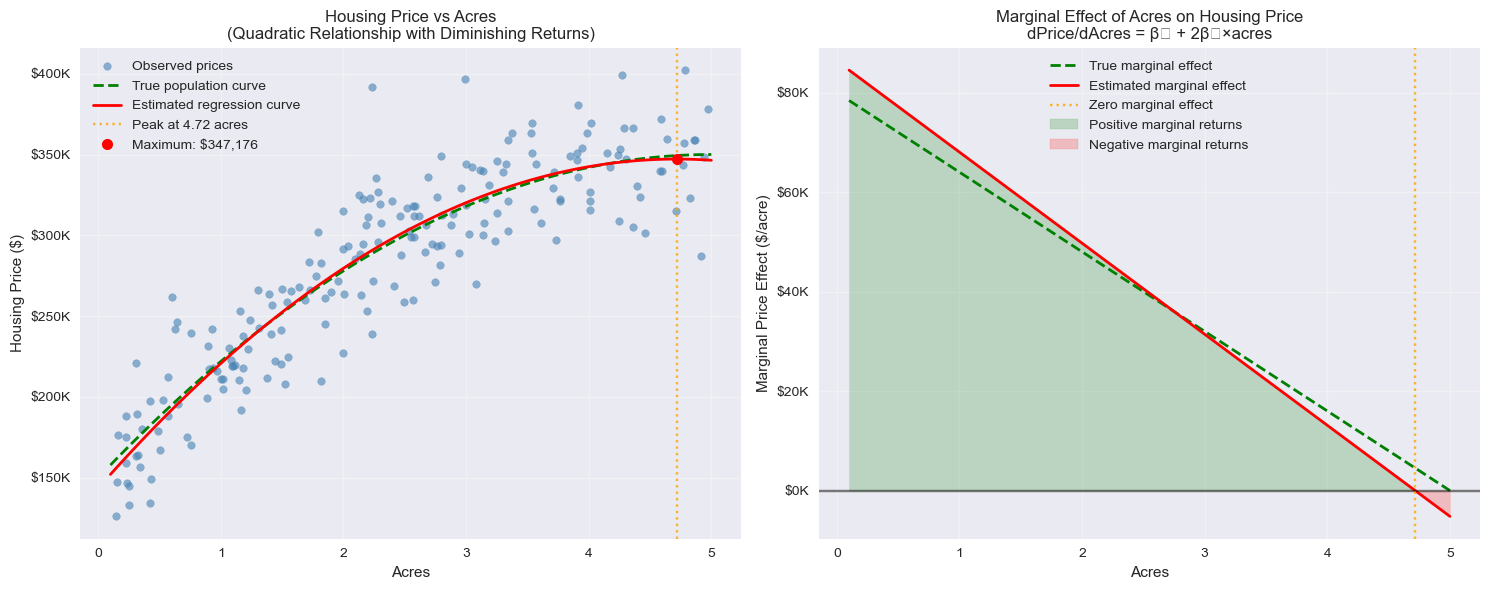


5. INTERPRETATION OF RESULTS
----------------------------------------
DIMINISHING RETURNS EXPLANATION:
───────────────────────────────────
• At 0.5 acres: Marginal effect = $77,255/acre
• At 1.0 acres: Marginal effect = $68,196/acre
• At 2.0 acres: Marginal effect = $50,077/acre
• At 3.0 acres: Marginal effect = $31,053/acre

ECONOMIC INTERPRETATION:
─────────────────────────
• The quadratic term (β₂ < 0) captures diminishing marginal utility of land
• Initially, additional acres significantly increase property value
• As lot size increases, each additional acre adds less value
• Beyond 4.72 acres, additional land actually decreases value
• This could reflect maintenance costs, taxes, or market preferences

MARGINAL ANALYSIS:
────────────────────
The derivative dPrice/dAcres tells us:
• How much the price changes for a small increase in acres
• When marginal benefit > 0: More acres increase value
• When marginal benefit = 0: Optimal lot size reached
• When marginal benefit < 0: Additi

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

# Set style and random seed
plt.style.use('seaborn-v0_8')
np.random.seed(2)

print("=" * 70)
print("HOUSING PRICE vs ACRES: DIMINISHING RETURNS ANALYSIS")
print("=" * 70)

# ============================================================================
# PART 1: SIMULATE HOUSING DATA WITH DIMINISHING RETURNS
# ============================================================================
print("\n1. DATA SIMULATION")
print("-" * 40)

# Generate acres data (independent variable)
n_houses = 200
acres = np.random.uniform(0.1, 5.0, n_houses)  # 0.1 to 5 acres

# True population parameters for the quadratic model
# Price = β₀ + β₁(acres) + β₂(acres²) + ε
beta_0 = 150000   # Base price (intercept)
beta_1 = 80000    # Linear coefficient (positive)
beta_2 = -8000    # Quadratic coefficient (negative for diminishing returns)

# Calculate true housing prices with quadratic relationship
price_true = beta_0 + beta_1 * acres + beta_2 * (acres**2)

# Add random noise
noise_std = 25000
epsilon = np.random.normal(0, noise_std, n_houses)
price_observed = price_true + epsilon

print(f"Sample size: {n_houses} houses")
print(f"Acres range: {acres.min():.2f} to {acres.max():.2f}")
print(f"True population model:")
print(f"Price = {beta_0:,} + {beta_1:,}×(acres) + {beta_2:,}×(acres²) + ε")
print(f"Noise standard deviation: ${noise_std:,}")

# ============================================================================
# PART 2: FIT REGRESSION MODEL
# ============================================================================
print(f"\n2. REGRESSION MODEL FITTING")
print("-" * 40)

# Prepare data for sklearn
X = acres.reshape(-1, 1)
y = price_observed

# Create polynomial features (acres and acres²)
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X)

# Fit the model
model = LinearRegression(fit_intercept=False)  # We already have intercept in polynomial features
model.fit(X_poly, y)

# Extract estimated coefficients
beta_hat = model.coef_
print(f"Estimated coefficients:")
print(f"β̂₀ (intercept) = ${beta_hat[0]:,.0f}")
print(f"β̂₁ (acres)     = ${beta_hat[1]:,.0f}")
print(f"β̂₂ (acres²)    = ${beta_hat[2]:,.0f}")

print(f"\nTrue vs Estimated:")
print(f"β₀: True = ${beta_0:,}, Estimated = ${beta_hat[0]:,.0f}")
print(f"β₁: True = ${beta_1:,}, Estimated = ${beta_hat[1]:,.0f}")
print(f"β₂: True = ${beta_2:,}, Estimated = ${beta_hat[2]:,.0f}")

# Model equation
print(f"\nEstimated model equation:")
print(f"Price = {beta_hat[0]:,.0f} + {beta_hat[1]:,.0f}×(acres) + {beta_hat[2]:,.0f}×(acres²)")

# ============================================================================
# PART 3: DERIVATIVE ANALYSIS
# ============================================================================
print(f"\n3. DERIVATIVE ANALYSIS")
print("-" * 40)

print("For the quadratic model: Price = β₀ + β₁×acres + β₂×acres²")
print("The derivative (marginal effect) is:")
print("dPrice/dAcres = β₁ + 2×β₂×acres")
print()
print(f"Using estimated coefficients:")
print(f"dPrice/dAcres = {beta_hat[1]:,.0f} + 2×({beta_hat[2]:,.0f})×acres")
print(f"dPrice/dAcres = {beta_hat[1]:,.0f} + {2*beta_hat[2]:,.0f}×acres")

# Calculate derivative values
acres_range = np.linspace(0.1, 5.0, 100)
derivative_true = beta_1 + 2 * beta_2 * acres_range
derivative_estimated = beta_hat[1] + 2 * beta_hat[2] * acres_range

# Find the peak (where derivative = 0)
peak_acres_true = -beta_1 / (2 * beta_2)
peak_acres_estimated = -beta_hat[1] / (2 * beta_hat[2])

print(f"\nDiminishing returns analysis:")
print(f"Marginal benefit becomes zero at: {peak_acres_estimated:.2f} acres")
print(f"(True optimum: {peak_acres_true:.2f} acres)")

max_price_estimated = beta_hat[0] + beta_hat[1]*peak_acres_estimated + beta_hat[2]*(peak_acres_estimated**2)
print(f"Maximum estimated price: ${max_price_estimated:,.0f}")

# ============================================================================
# PART 4: PLOTTING
# ============================================================================
print(f"\n4. VISUALIZATION")
print("-" * 40)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Housing price vs acres with regression curve
ax1.scatter(acres, price_observed, alpha=0.6, s=30, color='steelblue', label='Observed prices')

# Plot true and estimated regression curves
price_true_line = beta_0 + beta_1 * acres_range + beta_2 * (acres_range**2)
price_estimated_line = beta_hat[0] + beta_hat[1] * acres_range + beta_hat[2] * (acres_range**2)

ax1.plot(acres_range, price_true_line, 'g--', linewidth=2, label='True population curve')
ax1.plot(acres_range, price_estimated_line, 'r-', linewidth=2, label='Estimated regression curve')

# Mark the peak
ax1.axvline(peak_acres_estimated, color='orange', linestyle=':', alpha=0.8, label=f'Peak at {peak_acres_estimated:.2f} acres')
ax1.plot(peak_acres_estimated, max_price_estimated, 'ro', markersize=8, label=f'Maximum: ${max_price_estimated:,.0f}')

ax1.set_xlabel('Acres')
ax1.set_ylabel('Housing Price ($)')
ax1.set_title('Housing Price vs Acres\n(Quadratic Relationship with Diminishing Returns)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Plot 2: Derivative (marginal effect)
ax2.plot(acres_range, derivative_true, 'g--', linewidth=2, label='True marginal effect')
ax2.plot(acres_range, derivative_estimated, 'r-', linewidth=2, label='Estimated marginal effect')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.axvline(peak_acres_estimated, color='orange', linestyle=':', alpha=0.8, label=f'Zero marginal effect')

# Fill areas to show positive/negative returns
acres_pos = acres_range[acres_range < peak_acres_estimated]
derivative_pos = derivative_estimated[acres_range < peak_acres_estimated]
acres_neg = acres_range[acres_range > peak_acres_estimated]
derivative_neg = derivative_estimated[acres_range > peak_acres_estimated]

ax2.fill_between(acres_pos, 0, derivative_pos, alpha=0.2, color='green', label='Positive marginal returns')
ax2.fill_between(acres_neg, 0, derivative_neg, alpha=0.2, color='red', label='Negative marginal returns')

ax2.set_xlabel('Acres')
ax2.set_ylabel('Marginal Price Effect ($/acre)')
ax2.set_title('Marginal Effect of Acres on Housing Price\ndPrice/dAcres = β₁ + 2β₂×acres')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
# plt.savefig('housing_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================================
# PART 5: DETAILED INTERPRETATION
# ============================================================================
print(f"\n5. INTERPRETATION OF RESULTS")
print("-" * 40)

print("DIMINISHING RETURNS EXPLANATION:")
print("─" * 35)
print(f"• At 0.5 acres: Marginal effect = ${derivative_estimated[np.argmin(np.abs(acres_range - 0.5))]:,.0f}/acre")
print(f"• At 1.0 acres: Marginal effect = ${derivative_estimated[np.argmin(np.abs(acres_range - 1.0))]:,.0f}/acre")
print(f"• At 2.0 acres: Marginal effect = ${derivative_estimated[np.argmin(np.abs(acres_range - 2.0))]:,.0f}/acre")
print(f"• At 3.0 acres: Marginal effect = ${derivative_estimated[np.argmin(np.abs(acres_range - 3.0))]:,.0f}/acre")

print(f"\nECONOMIC INTERPRETATION:")
print("─" * 25)
print("• The quadratic term (β₂ < 0) captures diminishing marginal utility of land")
print("• Initially, additional acres significantly increase property value")
print("• As lot size increases, each additional acre adds less value")
print(f"• Beyond {peak_acres_estimated:.2f} acres, additional land actually decreases value")
print("• This could reflect maintenance costs, taxes, or market preferences")

print(f"\nMARGINAL ANALYSIS:")
print("─" * 20)
print("The derivative dPrice/dAcres tells us:")
print("• How much the price changes for a small increase in acres")
print("• When marginal benefit > 0: More acres increase value")
print("• When marginal benefit = 0: Optimal lot size reached")
print("• When marginal benefit < 0: Additional acres decrease value")

# ============================================================================
# PART 6: STATISTICAL SUMMARY
# ============================================================================
print(f"\n6. MODEL STATISTICS")
print("-" * 40)

# Calculate R²
y_pred = model.predict(X_poly)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"Model R²: {r_squared:.4f}")
print(f"Root Mean Square Error: ${np.sqrt(np.mean((y - y_pred)**2)):,.0f}")

# Show some predictions vs actual
print(f"\nSample predictions:")
for i in range(5):
    actual = price_observed[i]
    predicted = y_pred[i]
    error = actual - predicted
    print(f"House {i+1}: {acres[i]:.2f} acres → Actual: ${actual:,.0f}, Predicted: ${predicted:,.0f}, Error: ${error:,.0f}")

<p>In this example when including an independent variable squared, it shows bigger isn't always better. We have drastic increases at the beginning but after about 5 acres of land the return diminishes greatly.</p>
<p>The second plot shows the change in price given land size. Once you go past that sweet spot you'll get diminishing returns.</p>

<h3>(3) Come up with a story and simulate data for a population regression model with two independent variables: a continuous variable and a categorical variable. </h3>
<p> Plot the data on a scatter plot. Use the LinearRegression class from the linear_model module in the sklearn library to estimate two regression equations: one that includes only the continuous variable as an independent variable, and one that includes both the continuous and categorical variable (see the Introduction to Econometrics colabLinks to an external site.). 
Plot these lines on the same chart. (Note that the model with the categorical will actually be represented by two lines like in the Colab example, so there will be three total lines on the chart.) Comment on how well the lines do in terms of estimating the relationship (slope) between the dependent variable and continuous independent variable.</p>

=== COFFEE SHOP REVENUE ANALYSIS ===

Story: A coffee shop chain wants to understand factors affecting daily revenue.
Variables:
- Continuous: Daily foot traffic (number of people)
- Categorical: Location type (0=Suburban, 1=Downtown)
- Dependent: Daily revenue ($)

Dataset: 150 coffee shops observed
Suburban locations: 97 shops
Downtown locations: 53 shops


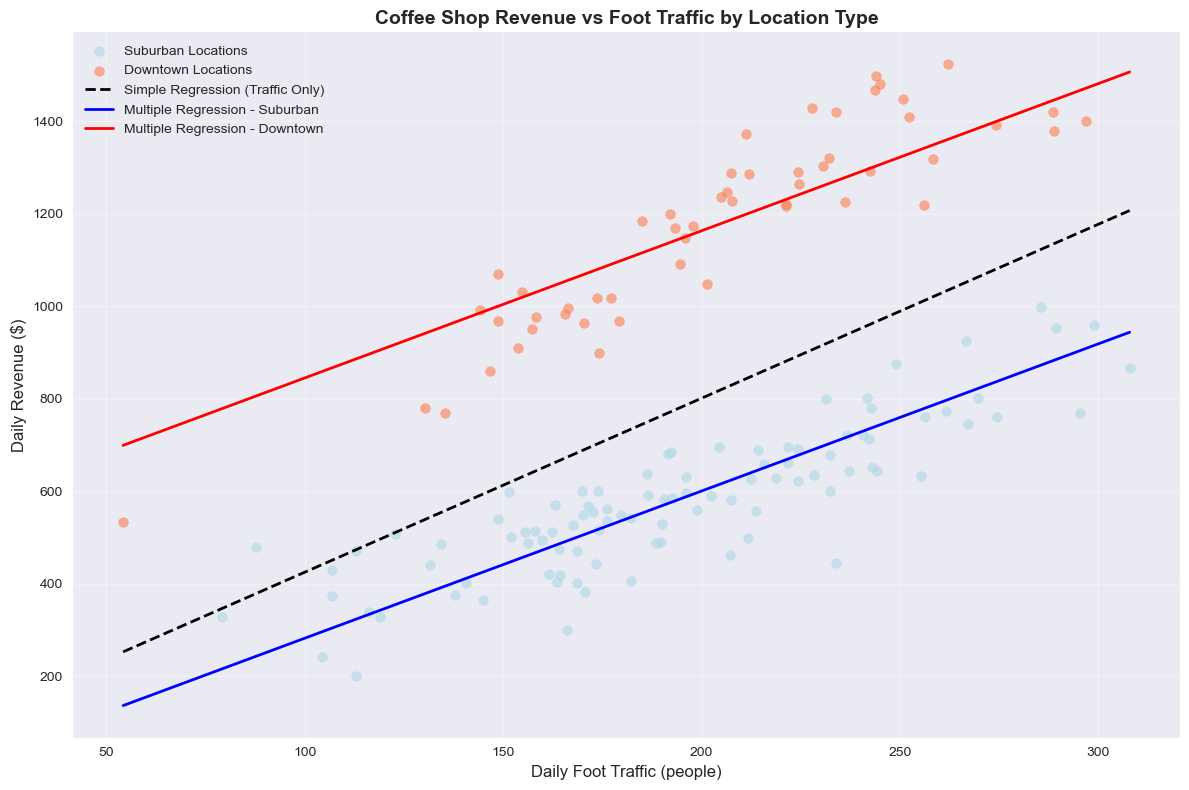


=== MODEL RESULTS ===

1. SIMPLE REGRESSION (Traffic Only):
   Intercept: $49.15
   Slope (Traffic): $3.76 per person
   R²: 0.298

2. MULTIPLE REGRESSION (Traffic + Location):
   Intercept: $-35.56
   Slope (Traffic): $3.18 per person
   Location Effect: $562.36 (Downtown premium)
   R²: 0.928

=== TRUE vs ESTIMATED SLOPES ===

True slopes from data generation:
   Suburban slope: $2.50 per person
   Downtown slope: $4.30 per person

Estimated slopes:
   Simple regression slope: $3.76 per person
   Multiple regression - Suburban: $3.18 per person
   Multiple regression - Downtown: $565.54 per person


In [4]:
# Set random seed for reproducibility
np.random.seed(3)

# Story: Coffee shop chain analyzing daily revenue
# Continuous variable: Daily foot traffic (people per day)
# Categorical variable: Location type (downtown vs suburban)
# Dependent variable: Daily revenue ($)

# Simulate data
n_samples = 150

# Generate foot traffic data (continuous variable)
foot_traffic = np.random.normal(200, 50, n_samples)
foot_traffic = np.clip(foot_traffic, 50, 400)  # Keep realistic bounds

# Generate location type (categorical variable: 0=suburban, 1=downtown)
location_type = np.random.binomial(1, 0.4, n_samples)  # 40% downtown locations

# Create revenue with realistic relationships:
# - Base revenue increases with foot traffic
# - Downtown locations have higher revenue per customer (premium effect)
# - Add some noise
base_revenue = 100  # Base daily revenue
traffic_effect = 2.5  # Revenue per person for suburban
downtown_premium = 1.8  # Additional revenue per person for downtown
location_bonus = 200  # Fixed bonus for downtown locations

revenue = (base_revenue + 
          traffic_effect * foot_traffic + 
          downtown_premium * foot_traffic * location_type + 
          location_bonus * location_type + 
          np.random.normal(0, 80, n_samples))  # noise

# Ensure no negative revenue
revenue = np.clip(revenue, 0, None)

print("=== COFFEE SHOP REVENUE ANALYSIS ===")
print("\nStory: A coffee shop chain wants to understand factors affecting daily revenue.")
print("Variables:")
print("- Continuous: Daily foot traffic (number of people)")
print("- Categorical: Location type (0=Suburban, 1=Downtown)")
print("- Dependent: Daily revenue ($)")
print(f"\nDataset: {n_samples} coffee shops observed")
print(f"Suburban locations: {np.sum(location_type == 0)} shops")
print(f"Downtown locations: {np.sum(location_type == 1)} shops")

# Create scatter plot
plt.figure(figsize=(12, 8))

# Plot data points by location type
suburban_mask = location_type == 0
downtown_mask = location_type == 1

plt.scatter(foot_traffic[suburban_mask], revenue[suburban_mask], 
           alpha=0.6, color='lightblue', label='Suburban Locations', s=50)
plt.scatter(foot_traffic[downtown_mask], revenue[downtown_mask], 
           alpha=0.6, color='coral', label='Downtown Locations', s=50)

# Model 1: Simple linear regression (continuous variable only)
X_simple = foot_traffic.reshape(-1, 1)
y = revenue

model_simple = LinearRegression()
model_simple.fit(X_simple, y)

# Model 2: Multiple regression (continuous + categorical)
X_multiple = np.column_stack([foot_traffic, location_type])
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)

# Generate prediction lines
x_range = np.linspace(foot_traffic.min(), foot_traffic.max(), 100)

# Simple model predictions (single line)
y_pred_simple = model_simple.predict(x_range.reshape(-1, 1))

# Multiple model predictions (separate lines for each location type)
# Suburban locations (location_type = 0)
X_suburban = np.column_stack([x_range, np.zeros(len(x_range))])
y_pred_suburban = model_multiple.predict(X_suburban)

# Downtown locations (location_type = 1)  
X_downtown = np.column_stack([x_range, np.ones(len(x_range))])
y_pred_downtown = model_multiple.predict(X_downtown)

# Plot regression lines
plt.plot(x_range, y_pred_simple, 'black', linewidth=2, linestyle='--', 
         label='Simple Regression (Traffic Only)')
plt.plot(x_range, y_pred_suburban, 'blue', linewidth=2, 
         label='Multiple Regression - Suburban')
plt.plot(x_range, y_pred_downtown, 'red', linewidth=2, 
         label='Multiple Regression - Downtown')

plt.xlabel('Daily Foot Traffic (people)', fontsize=12)
plt.ylabel('Daily Revenue ($)', fontsize=12)
plt.title('Coffee Shop Revenue vs Foot Traffic by Location Type', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print model statistics
print("\n=== MODEL RESULTS ===")

# Simple regression results
print(f"\n1. SIMPLE REGRESSION (Traffic Only):")
print(f"   Intercept: ${model_simple.intercept_:.2f}")
print(f"   Slope (Traffic): ${model_simple.coef_[0]:.2f} per person")
print(f"   R²: {model_simple.score(X_simple, y):.3f}")

# Multiple regression results  
print(f"\n2. MULTIPLE REGRESSION (Traffic + Location):")
print(f"   Intercept: ${model_multiple.intercept_:.2f}")
print(f"   Slope (Traffic): ${model_multiple.coef_[0]:.2f} per person")
print(f"   Location Effect: ${model_multiple.coef_[1]:.2f} (Downtown premium)")
print(f"   R²: {model_multiple.score(X_multiple, y):.3f}")

# Calculate true slopes for comparison
true_suburban_slope = traffic_effect
true_downtown_slope = traffic_effect + downtown_premium

print(f"\n=== TRUE vs ESTIMATED SLOPES ===")
print(f"\nTrue slopes from data generation:")
print(f"   Suburban slope: ${true_suburban_slope:.2f} per person")
print(f"   Downtown slope: ${true_downtown_slope:.2f} per person")

print(f"\nEstimated slopes:")
print(f"   Simple regression slope: ${model_simple.coef_[0]:.2f} per person")
print(f"   Multiple regression - Suburban: ${model_multiple.coef_[0]:.2f} per person")  
print(f"   Multiple regression - Downtown: ${model_multiple.coef_[0] + model_multiple.coef_[1]:.2f} per person")

<h3>Comment on how well the lines do in terms of estimating the relationship (slope) between the dependent variable and continuous independent variable.</h3>
<p>What do these regression lines show us? It shows us that omitting important variables can lead to incorrect slope estimates. The dependent variable has a very low r^2 score when only traffic is used as an independent variable because it was unable to capture the true differences in the dataset. The single variable linear regression model averaged out the slope of the two different locations so the overall slope wasn't correct for either slopes.</p>
<p>When we used the multiple linear regression model and had the categorical feature to differentiate two groups (suburban & downtown) this resulted in a much higher r^2 score since the model allowed two slopes resulting in a better fitting model. This exercise displays why it is so important to understand datasets and the data within them to choose independent variables or features that impact the dependent variable or target meaningfully so that inference may be drawn from these important features. I can clearly see now that downtown shops in let's say SLC pull in more revenue than suburban coffee shops like American Fork or Layton.</p>

<h3>(4) Prove that the slope coefficient from a regression of a dependent variable on a single binary independent variable, which takes values of 0 and 1, is equivalent to the difference in population means between the independent and dependent variables.</h3>

<p>Breaking this technical statement down into laymen terms says that we're basically looking for a pattern between a binary variable and depending on that outcome does it affect the next regression results.</p>
<p>An example for this situation would be like "did you study for this test?", and then depending on this binary outcome we can use that information for the next regression question of "what was your test score?".</p>
<p>Now whatever slope we find in this regression model will represent the average score of yes and no from the previous survey results.</p>

PROOF: Regression Slope on Binary Variable = Difference in Means

1. SAMPLE DATA SUMMARY:
----------------------------------------
Group 0 (X=0): n = 150, True mean = 10
Group 1 (X=1): n = 100, True mean = 15
True difference in means = 5

Sample mean for X=0: 9.7530
Sample mean for X=1: 15.3523
Sample difference in means: 5.5993

2. REGRESSION ANALYSIS:
----------------------------------------
Sklearn - Intercept (β₀): 9.7530
Sklearn - Slope (β₁): 5.5993
Statsmodels - Intercept (β₀): 9.7530
Statsmodels - Slope (β₁): 5.5993

3. MATHEMATICAL PROOF:
----------------------------------------
For the regression model: Y = β₀ + β₁X + ε
where X is binary (0 or 1):

When X = 0: E[Y|X=0] = β₀
When X = 1: E[Y|X=1] = β₀ + β₁

Therefore: β₁ = E[Y|X=1] - E[Y|X=0]

This proves that the slope coefficient equals the difference in conditional means!

4. NUMERICAL VERIFICATION:
----------------------------------------
Difference in sample means:     5.599280
Regression slope (sklearn):     5.599280
Regre

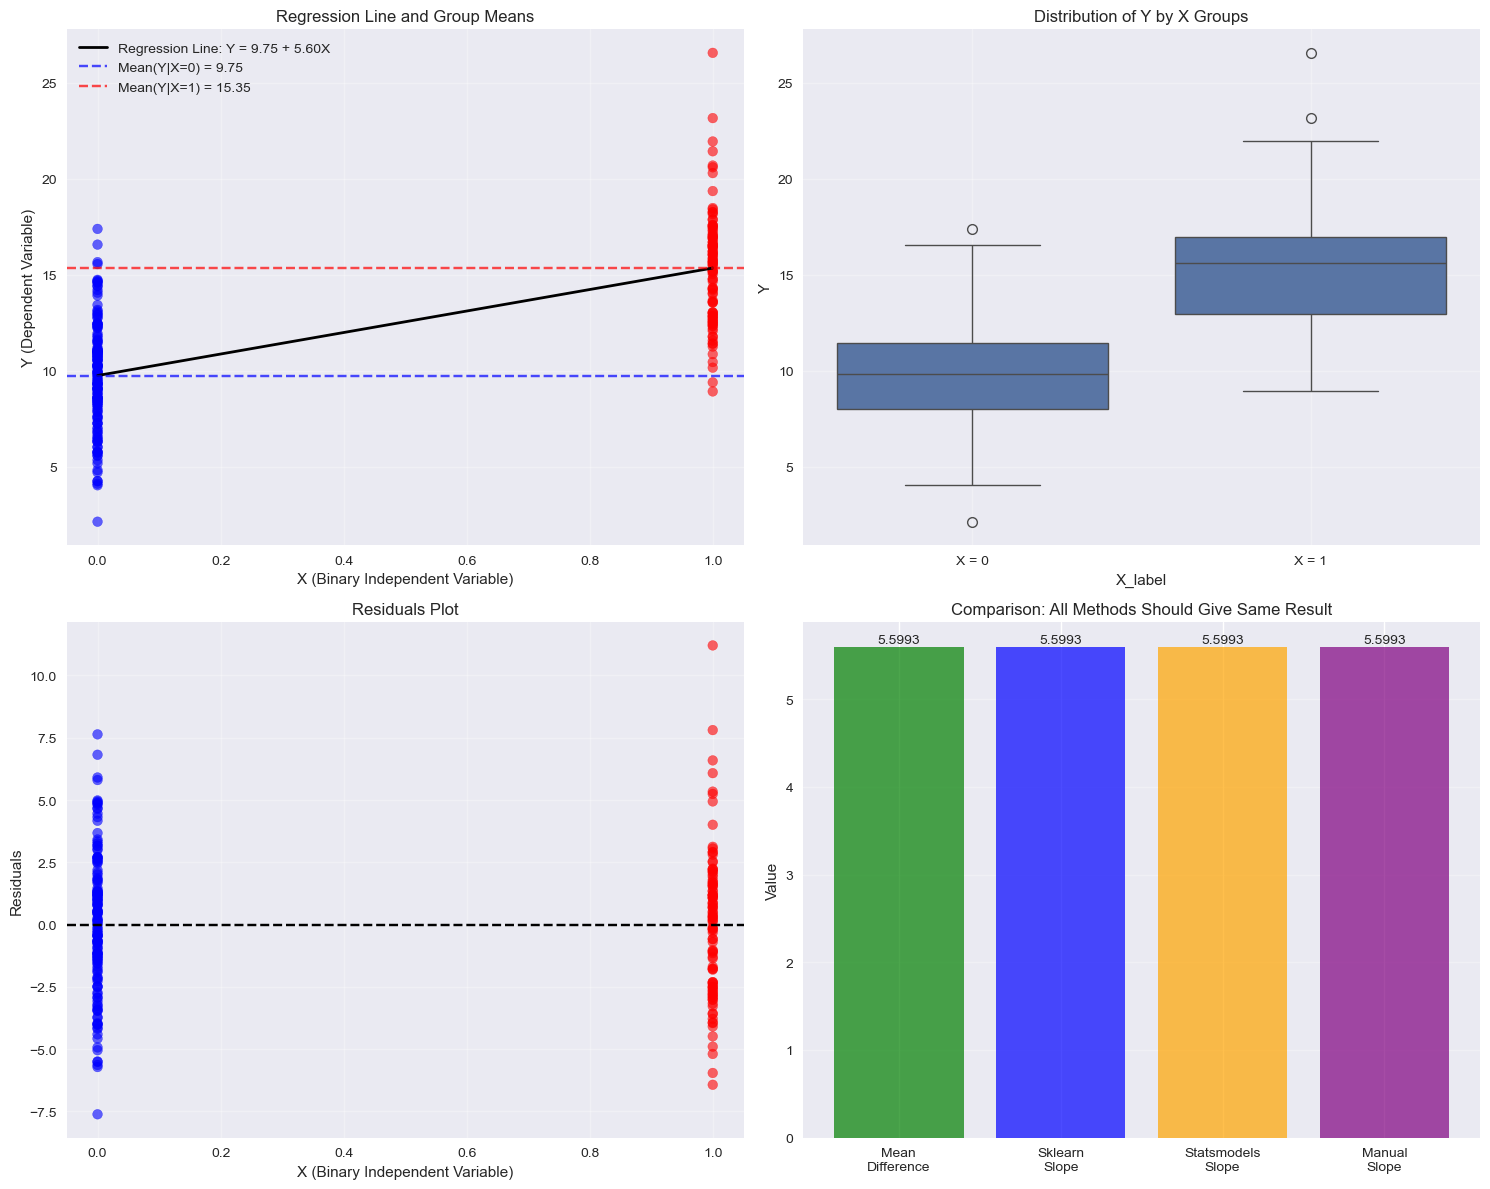


7. THEORETICAL EXPLANATION:
----------------------------------------

The key insight is that for a binary independent variable X ∈ {0,1}, the regression model:
Y = β₀ + β₁X + ε

reduces to:
- When X = 0: Y = β₀ + ε  →  E[Y|X=0] = β₀
- When X = 1: Y = β₀ + β₁ + ε  →  E[Y|X=1] = β₀ + β₁

Taking the difference:
E[Y|X=1] - E[Y|X=0] = (β₀ + β₁) - β₀ = β₁

This proves that β₁ (the slope coefficient) equals the difference in conditional means.

The regression line essentially connects the two group means, with:
- Intercept = Mean of group where X=0
- Slope = Difference between group means


CONCLUSION: PROOF VERIFIED ✓
The regression slope (5.599280) equals the difference in means (5.599280)
This relationship holds exactly for any binary independent variable!


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

print("="*80)
print("PROOF: Regression Slope on Binary Variable = Difference in Means")
print("="*80)

# Generate sample data
n_group0 = 150  # Sample size for group 0
n_group1 = 100  # Sample size for group 1
n_total = n_group0 + n_group1

# Create binary independent variable X (0s and 1s)
X = np.concatenate([np.zeros(n_group0), np.ones(n_group1)])

# Create dependent variable Y with different means for each group
mean_group0 = 10
mean_group1 = 15
std_dev = 3

Y_group0 = np.random.normal(mean_group0, std_dev, n_group0)
Y_group1 = np.random.normal(mean_group1, std_dev, n_group1)
Y = np.concatenate([Y_group0, Y_group1])

# Create DataFrame for easier manipulation
df = pd.DataFrame({'X': X, 'Y': Y})

print("\n1. SAMPLE DATA SUMMARY:")
print("-" * 40)
print(f"Group 0 (X=0): n = {n_group0}, True mean = {mean_group0}")
print(f"Group 1 (X=1): n = {n_group1}, True mean = {mean_group1}")
print(f"True difference in means = {mean_group1 - mean_group0}")

# Calculate sample means
sample_mean_0 = df[df['X'] == 0]['Y'].mean()
sample_mean_1 = df[df['X'] == 1]['Y'].mean()
sample_diff = sample_mean_1 - sample_mean_0

print(f"\nSample mean for X=0: {sample_mean_0:.4f}")
print(f"Sample mean for X=1: {sample_mean_1:.4f}")
print(f"Sample difference in means: {sample_diff:.4f}")

print("\n2. REGRESSION ANALYSIS:")
print("-" * 40)

# Method 1: Sklearn Linear Regression
X_reshaped = X.reshape(-1, 1)
reg_sklearn = LinearRegression().fit(X_reshaped, Y)
slope_sklearn = reg_sklearn.coef_[0]
intercept_sklearn = reg_sklearn.intercept_

print(f"Sklearn - Intercept (β₀): {intercept_sklearn:.4f}")
print(f"Sklearn - Slope (β₁): {slope_sklearn:.4f}")

# Method 2: Statsmodels (with intercept)
X_with_intercept = sm.add_constant(X)  # Adds intercept column
reg_statsmodels = sm.OLS(Y, X_with_intercept).fit()
slope_statsmodels = reg_statsmodels.params[1]
intercept_statsmodels = reg_statsmodels.params[0]

print(f"Statsmodels - Intercept (β₀): {intercept_statsmodels:.4f}")
print(f"Statsmodels - Slope (β₁): {slope_statsmodels:.4f}")

print("\n3. MATHEMATICAL PROOF:")
print("-" * 40)

# For binary regression Y = β₀ + β₁X + ε where X ∈ {0,1}
# When X = 0: E[Y|X=0] = β₀
# When X = 1: E[Y|X=1] = β₀ + β₁
# Therefore: β₁ = E[Y|X=1] - E[Y|X=0]

print("For the regression model: Y = β₀ + β₁X + ε")
print("where X is binary (0 or 1):")
print("")
print("When X = 0: E[Y|X=0] = β₀")
print("When X = 1: E[Y|X=1] = β₀ + β₁")
print("")
print("Therefore: β₁ = E[Y|X=1] - E[Y|X=0]")
print("")
print("This proves that the slope coefficient equals the difference in conditional means!")

print("\n4. NUMERICAL VERIFICATION:")
print("-" * 40)
print(f"Difference in sample means:     {sample_diff:.6f}")
print(f"Regression slope (sklearn):     {slope_sklearn:.6f}")
print(f"Regression slope (statsmodels): {slope_statsmodels:.6f}")
print(f"Difference (means - slope):     {abs(sample_diff - slope_sklearn):.10f}")

# Verify intercept equals mean of group 0
print(f"\nIntercept should equal mean of X=0 group:")
print(f"Mean of X=0 group:        {sample_mean_0:.6f}")
print(f"Regression intercept:     {intercept_sklearn:.6f}")
print(f"Difference:               {abs(sample_mean_0 - intercept_sklearn):.10f}")

print("\n5. STATISTICAL DETAILS:")
print("-" * 40)
print(reg_statsmodels.summary().tables[1])

print("\n6. MANUAL CALCULATION VERIFICATION:")
print("-" * 40)
# Manual calculation of OLS coefficients for binary regressor
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# For binary X, the slope formula simplifies significantly
numerator = np.sum((X - X_mean) * (Y - Y_mean))
denominator = np.sum((X - X_mean)**2)
manual_slope = numerator / denominator

# Alternative manual calculation using means directly
n0 = np.sum(X == 0)
n1 = np.sum(X == 1)
p = n1 / (n0 + n1)  # proportion in group 1

manual_slope_alt = (sample_mean_1 - sample_mean_0)
manual_intercept = sample_mean_0

print(f"Manual slope calculation:     {manual_slope:.6f}")
print(f"Manual slope (alternative):   {manual_slope_alt:.6f}")
print(f"Manual intercept:             {manual_intercept:.6f}")

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Scatter plot with regression line
ax1.scatter(X, Y, alpha=0.6, c=['blue' if x == 0 else 'red' for x in X])
x_line = np.array([0, 1])
y_line = intercept_sklearn + slope_sklearn * x_line
ax1.plot(x_line, y_line, 'black', linewidth=2, label=f'Regression Line: Y = {intercept_sklearn:.2f} + {slope_sklearn:.2f}X')
ax1.axhline(sample_mean_0, color='blue', linestyle='--', alpha=0.7, label=f'Mean(Y|X=0) = {sample_mean_0:.2f}')
ax1.axhline(sample_mean_1, color='red', linestyle='--', alpha=0.7, label=f'Mean(Y|X=1) = {sample_mean_1:.2f}')
ax1.set_xlabel('X (Binary Independent Variable)')
ax1.set_ylabel('Y (Dependent Variable)')
ax1.set_title('Regression Line and Group Means')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Box plot showing distributions
df_plot = df.copy()
df_plot['X_label'] = df_plot['X'].map({0: 'X = 0', 1: 'X = 1'})
sns.boxplot(data=df_plot, x='X_label', y='Y', ax=ax2)
ax2.set_title('Distribution of Y by X Groups')
ax2.grid(True, alpha=0.3)

# Plot 3: Residuals plot
Y_pred = intercept_sklearn + slope_sklearn * X
residuals = Y - Y_pred
ax3.scatter(X, residuals, alpha=0.6, c=['blue' if x == 0 else 'red' for x in X])
ax3.axhline(0, color='black', linestyle='--')
ax3.set_xlabel('X (Binary Independent Variable)')
ax3.set_ylabel('Residuals')
ax3.set_title('Residuals Plot')
ax3.grid(True, alpha=0.3)

# Plot 4: Comparison of slope vs mean difference
methods = ['Mean\nDifference', 'Sklearn\nSlope', 'Statsmodels\nSlope', 'Manual\nSlope']
values = [sample_diff, slope_sklearn, slope_statsmodels, manual_slope]
colors = ['green', 'blue', 'orange', 'purple']

bars = ax4.bar(methods, values, color=colors, alpha=0.7)
ax4.set_ylabel('Value')
ax4.set_title('Comparison: All Methods Should Give Same Result')
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n7. THEORETICAL EXPLANATION:")
print("-" * 40)
print("""
The key insight is that for a binary independent variable X ∈ {0,1}, the regression model:
Y = β₀ + β₁X + ε

reduces to:
- When X = 0: Y = β₀ + ε  →  E[Y|X=0] = β₀
- When X = 1: Y = β₀ + β₁ + ε  →  E[Y|X=1] = β₀ + β₁

Taking the difference:
E[Y|X=1] - E[Y|X=0] = (β₀ + β₁) - β₀ = β₁

This proves that β₁ (the slope coefficient) equals the difference in conditional means.

The regression line essentially connects the two group means, with:
- Intercept = Mean of group where X=0
- Slope = Difference between group means
""")

print("\n" + "="*80)
print("CONCLUSION: PROOF VERIFIED ✓")
print("="*80)
print(f"The regression slope ({slope_sklearn:.6f}) equals the difference in means ({sample_diff:.6f})")
print("This relationship holds exactly for any binary independent variable!")

<h4>Plot Summary</h4>
<p>The regression plot and group means shows us that binary regression is the same as comparing group means.</p>
<p>The box plot of y distribution by x groups shows distributions which is useful for determining regression assumptions and robustness since outliers can skew distributions.</p>
<p>The residuals plot is there to confirm this binary regression model is capturing the relationship in the data showing a good model fit.</p>
<p>The final plot is a comparison of all of the methods to show that mathematically there is an equivalence thus proving our question about slope coefficients and difference in population means</p>
<p>This principal extends to a statistical method Analysis of Variance or ANOVA which is a technique I've used for feature selection.</p>